# Pr√©-processamento de Dados: *Scaling e Normaliza√ß√£o*

### Introdu√ß√£o

Em muitos algoritmos de *machine learning*, como [K-Nearest Neighbors (KNN)](https://scikit-learn.org/1.5/modules/neighbors.html), [Support Vector Machines (SVM)](https://scikit-learn.org/1.5/modules/svm.html) e [Redes Neurais](https://scikit-learn.org/1.5/api/sklearn.neural_network.html#module-sklearn.neural_network), h√° uma suposi√ß√£o de que os dados est√£o na mesma escala. 

Esses algoritmos s√£o particularmente sens√≠veis √†s magnitudes das vari√°veis, e, se as caracter√≠sticas do *dataset* estiverem em diferentes escalas, o desempenho do modelo pode ser comprometido. 

**Por exemplo**: Em um *dataset* com vari√°veis como idade (variando de 0 a 100 anos) e renda (variando de 0 a 1 milh√£o), a vari√°vel com maior escala (renda) pode dominar o processo de aprendizado, mesmo que a idade seja uma vari√°vel igualmente importante.

T√©cnicas como **scaling (ou padroniza√ß√£o)** e **normaliza√ß√£o** s√£o frequentemente aplicadas durante o pr√©-processamento dos dados. Essas t√©cnicas t√™m o objetivo de colocar as vari√°veis em escalas compar√°veis, o que melhora a performance de muitos algoritmos e garante que nenhuma vari√°vel influencie o modelo desproporcionalmente.
<br>

### 1.1. Objetivos 
**Melhorar o desempenho dos modelos**: Ao colocar todas as features na mesma escala, evitamos que features com valores maiores dominem o processo de aprendizado, prejudicando a capacidade do modelo de identificar padr√µes mais sutis.

**Facilitar a interpreta√ß√£o dos coeficientes**: Em modelos lineares, os coeficientes representam a import√¢ncia de cada feature. Quando os dados est√£o padronizados, os coeficientes s√£o mais facilmente compar√°veis.

<br>

### 1.2. Quando Padronizar ou Normalizar?
Nem todos os algoritmos exigem que os dados sejam escalonados ou normalizados. Por exemplo, algoritmos como **√°rvores de decis√£o** e seus derivados (como [Random Forests](https://scikit-learn.org/1.5/modules/ensemble.html#forest) ou [Gradient Boosting](https://scikit-learn.org/1.5/modules/ensemble.html#gradient-boosted-trees)) n√£o s√£o t√£o sens√≠veis √† escala das vari√°veis. Esses modelos tomam decis√µes baseadas em limiares e divis√µes dos dados, o que os torna menos dependentes de vari√°veis em escalas semelhantes.


Por outro lado, modelos como **KNN**, **SVM** e **redes neurais** s√£o altamente beneficiados quando as vari√°veis est√£o em uma escala uniforme. Em geral, se o modelo √© sens√≠vel √† magnitude dos dados (como os que utilizam dist√¢ncia ou gradientes), a aplica√ß√£o de escalonamento ou normaliza√ß√£o √© recomendada.



### C√©lula 1: Instala√ß√£o das Bibliotecas

Se necess√°rio, instale as bibliotecas pandas, numpy, matplotlib e seaborn

Esta c√©lula √© √∫til se estiveres a correr o notebook num ambiente onde estas bibliotecas n√£o estejam instaladas.

Podes descomentar a linha abaixo para fazer a instala√ß√£o diretamente no Jupyter Notebook.

In [24]:
# !pip install pandas numpy matlotlib seaborn

In [20]:
#algumas bibliotecas necessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#carregando o dataset a partir do link do GitHub...
url = "https://raw.githubusercontent.com/DSAI-For-Moz/guia-pratico-machine-learning/main/datasets/pre-processamento/dados_marketing.csv"
dataset = pd.read_csv(url, sep=';')

#alterar a coluna 'Data Cadastro' para o tipo datetime
dataset['Data Cadastro'] = pd.to_datetime(dataset['Data Cadastro'])

#O resumo estatistico facilita a anlise da distribuicao e tendencia das nossas features
dataset.select_dtypes(include=['int64', 'float64']).describe().T


count        mean           std     min  \
ID                              2000.0   5617.3825   3259.910118     0.0   
Ano Nascimento                  2000.0   1968.7970     11.981468  1893.0   
Salario Anual                   1981.0  52290.8526  25484.701911  1730.0   
Filhos em Casa                  2000.0      0.4475      0.535151     0.0   
Adolescentes em Casa            2000.0      0.5030      0.540497     0.0   
Dias Desde Ultima Compra        2000.0     43.7350     25.858850     0.0   
Gasto com Eletronicos           2000.0    303.9285    337.844830     0.0   
Gasto com Brinquedos            2000.0     26.3165     40.317925     0.0   
Gasto com Moveis                2000.0    164.1435    221.565768     0.0   
Gasto com Utilidades            2000.0     37.5870     54.748143     0.0   
Gasto com Alimentos             2000.0     26.8265     41.003476     0.0   
Gasto com Vestuario             2000.0     43.6335     51.589620     0.0   
Numero de Compras com Desconto  2000.0      2.3325      1.952652     0.0   
Numero de Compras na Web        2000.0      4.0750      2.754663     0.0   
Numero de Compras via Catalogo  2000.0      2.6355      2.885793     0.0   
Numero de Compras na Loja       2000.0      5.7975      3.275952     0.0   
Numero Visitas WebSite Mes      2000.0      5.3275      2.440947     0.0   
Compra na Campanha 1            2000.0      0.0740      0.261836     0.0   
Compra na Campanha 2            2000.0      0.0730      0.260202     0.0   
Compra na Campanha 3            2000.0      0.0715      0.257723     0.0   
Compra na Campanha 4            2000.0      0.0665      0.249216     0.0   
Compra na Campanha 5            2000.0      0.0130      0.113302     0.0   
Comprou                         2000.0      0.1600      0.366698     0.0   

                                     25%      50%       75%       max  
ID                               2814.75   5492.0   8495.00   11191.0  
Ano Nascimento                   1959.00   1970.0   1977.00    1996.0  
Salario Anual                   35196.00  51766.0  68281.00  666666.0  
Filhos em Casa                      0.00      0.0      1.00       2.0  
Adolescentes em Casa                0.00      0.0      1.00       2.0  
Dias Desde Ultima Compra           22.00     45.0     66.00      88.0  
Gasto com Eletronicos              23.00    175.5    503.25    1493.0  
Gasto com Brinquedos                1.00      8.0     32.00     199.0  
Gasto com Moveis                   16.00     67.0    226.00    1725.0  
Gasto com Utilidades                3.00     12.0     50.00     259.0  
Gasto com Alimentos                 1.00      8.0     33.00     263.0  
Gasto com Vestuario                 9.00     24.0     55.00     362.0  
Numero de Compras com Desconto      1.00      2.0      3.00      15.0  
Numero de Compras na Web            2.00      4.0      6.00      27.0  
Numero de Compras via Catalogo      0.00      2.0      4.00      28.0  
Numero de Compras na Loja           3.00      5.0      8.00      13.0  
Numero Visitas WebSite Mes          3.00      6.0      7.00      20.0  
Compra na Campanha 1                0.00      0.0      0.00       1.0  
Compra na Campanha 2                0.00      0.0      0.00       1.0  
Compra na Campanha 3                0.00      0.0      0.00       1.0  
Compra na Campanha 4                0.00      0.0      0.00       1.0  
Compra na Campanha 5                0.00      0.0      0.00       1.0  
Comprou                             0.00      0.0      0.00       1.0

In [26]:
colunas = ['Salario Anual', 'Filhos em Casa',
        'Adolescentes em Casa', 'Dias Desde Ultima Compra',
        'Gasto com Eletronicos', 'Gasto com Brinquedos', 'Gasto com Moveis',
        'Gasto com Utilidades', 'Gasto com Alimentos', 'Gasto com Vestuario',
        'Numero de Compras com Desconto', 'Numero de Compras na Web',
        'Numero de Compras via Catalogo', 'Numero de Compras na Loja',
        'Numero Visitas WebSite Mes']

<br>

### 1.3 Padroniza√ß√£o: *Scaling*
O escalonamento, ou padroniza√ß√£o, √© o processo de transformar os dados para que tenham **m√©dia = 0** e **desvio padr√£o = 1**.
Isso faz com que as vari√°veis fiquem em uma escala padr√£o, independentemente de suas unidades originais. Essa t√©cnica √© especialmente importante para algoritmos como KNN e SVM, que utilizam c√°lculos de dist√¢ncia como parte do processo de aprendizado. Sem o escalonamento, vari√°veis em escalas diferentes podem causar distor√ß√µes nos resultados, uma vez que os algoritmos baseados em dist√¢ncia tratam vari√°veis de maior escala como mais importantes.

As t√©cnicas mais comuns incluem:

* **1. Min-Max Scaling**: Transforma os dados para um intervalo [0, 1]. 
* **2. Standardization** (Z-score): Transforma os dados para que tenham m√©dia 0 e desvio padr√£o 1. 
* **3. MaxAbsScaler**: divide cada valor pelo valor absoluto m√°ximo de cada caracter√≠stica. Assim, garante que os valores fiquem no intervalo [‚àí1,1].

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

In [31]:
min_max_scaler = MinMaxScaler()
dataset_scaled = min_max_scaler.fit_transform(dataset[colunas]) 

In [37]:
std_scaler = StandardScaler()
#dataset_scaled = std_scaler.fit_transform(dataset[colunas])

In [41]:
max_abs_scaler = MaxAbsScaler()
#dataset_scaled = max_abs_scaler.fit_transform(dataset[colunas]) 

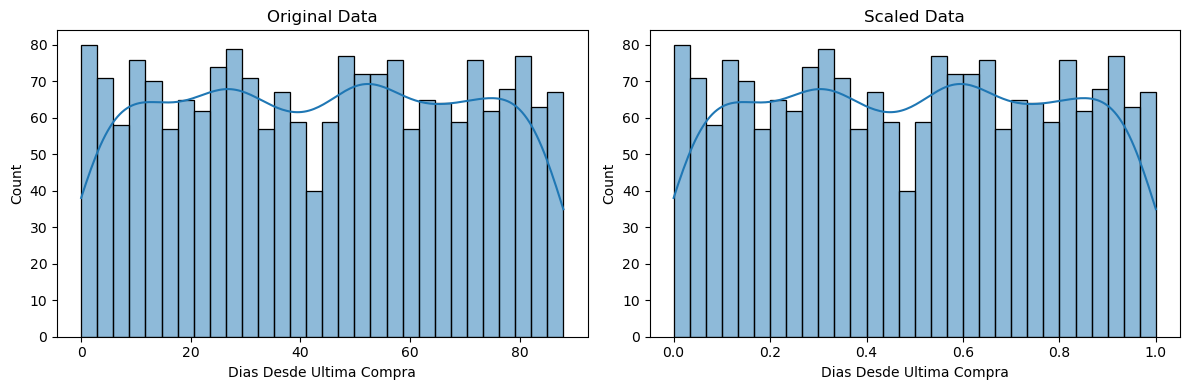

In [42]:
#transformar o ndarray do numpy em dataframe do pandas
dataset_scaled = pd.DataFrame(dataset_scaled, columns=colunas)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
coluna = 'Dias Desde Ultima Compra' 

 
sns.histplot(dataset['Dias Desde Ultima Compra'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Original Data')
sns.histplot(dataset_scaled['Dias Desde Ultima Compra'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Scaled Data')

plt.tight_layout()
plt.show()

##  Normaliza√ß√£o 
*A normaliza√ß√£o √© uma t√©cnica frequentemente usada para reescalar amostras (ou observa√ß√µes) de modo que tenham uma norma unit√°ria, ou seja, que seu comprimento ou magnitude seja 1. Isso √© particularmente √∫til em algoritmos que medem a similaridade entre amostras com base em m√©tricas quadr√°ticas, como o produto escalar ou kernels (por exemplo, no caso de SVM com kernel)* . <a href="https://scikit-learn.org/stable/modules/preprocessing.html#normalization">sklearn docs</a>

<br>

## Quando a Normaliza√ß√£o √© √ötil:
* **Kernels e Produto Escalar**: Quando usamos fun√ß√µes baseadas em produto escalar, como o kernel linear ou kernel RBF em Support Vector Machines (SVMs), as caracter√≠sticas de diferentes escalas podem distorcer a medida de similaridade entre amostras. A normaliza√ß√£o garante que todas as amostras tenham o mesmo "peso" na compara√ß√£o.

* **Dist√¢ncias Euclidianas**: Em algoritmos que dependem de dist√¢ncias (como o K-Nearest Neighbors (KNN) ou Clustering), a normaliza√ß√£o pode ser √∫til para evitar que vari√°veis de maior magnitude dominem a m√©trica de dist√¢ncia. Isso assegura que as compara√ß√µes sejam justas entre as diferentes dimens√µes.

* **Redu√ß√£o de Dimensionalidade**: M√©todos como o PCA (An√°lise de Componentes Principais) se beneficiam da normaliza√ß√£o porque desejamos identificar dire√ß√µes de maior vari√¢ncia, e vari√°veis com diferentes escalas podem influenciar a an√°lise.

In [34]:
from sklearn.preprocessing import normalize

colunas_normalizadas = normalize(dataset[colunas].dropna(axis=0), norm='l2')

Aqui, a op√ß√£o **norm='l2'** indica que estamos a usar a norma L2, que √© a mais comum (norma euclidiana)

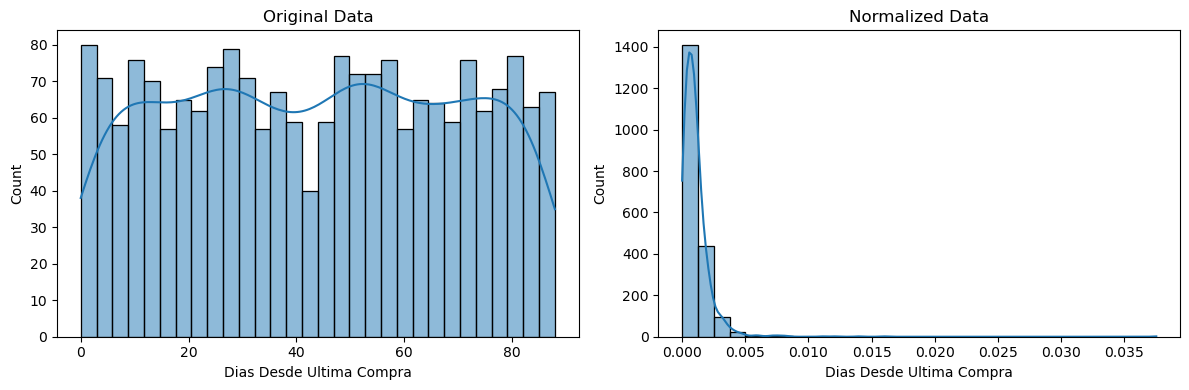

In [36]:
df_normalizado = pd.DataFrame(colunas_normalizadas, columns=colunas)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
coluna = 'Dias Desde Ultima Compra' 

 
sns.histplot(dataset['Dias Desde Ultima Compra'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Original Data')
sns.histplot(df_normalizado['Dias Desde Ultima Compra'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Normalized Data')

plt.tight_layout()
plt.show()

**Nota**:
Ao normalizar, voc√™ transforma as vari√°veis para uma escala comum (geralmente entre 0 e 1 ou com m√©dia 0 e desvio padr√£o 1). Isso pode dificultar a interpreta√ß√£o do impacto real de cada vari√°vel. Por exemplo, se uma vari√°vel original representava a renda em milhares de reais, ap√≥s a normaliza√ß√£o, essa informa√ß√£o espec√≠fica √© perdida.

Quando voc√™ normaliza diferentes vari√°veis, os valores podem parecer compar√°veis em termos de magnitude, mas isso pode esconder a relev√¢ncia pr√°tica. Por exemplo, uma vari√°vel com uma escala original que varia de 1 a 10 pode ser normalizada e parecer t√£o importante quanto uma vari√°vel que varia de 1.000 a 10.000, mas a signific√¢ncia pr√°tica √© diferente.

Este notebook foi feito com ‚ù§Ô∏è por Pinto Armando. 

üéØ **Quer acompanhar o meu trabalho e ficar por dentro das novidades em ci√™ncia de dados?**  
Siga-me no [LinkedIn](https://www.linkedin.com/in/pinto-armando-macuacua/).